In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df0 = pd.read_csv('movies.csv')

In [85]:
df0.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [86]:
df1 = pd.read_csv('ratings.csv')
df2 = pd.read_csv('tags.csv')

In [87]:
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [88]:
df2.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [89]:
df3 = pd.merge(df0,df2,on = 'movieId')

In [90]:
df3.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [91]:
df = pd.merge(df3,df1,on = 'movieId')

In [92]:
df.head()

,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483


In [93]:
sns.set_style('white')

In [94]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Woman Under the Influence, A (1974)    5.0
Who Killed Chea Vichea? (2010)         5.0
More (1998)                            5.0
Come and See (Idi i smotri) (1985)     5.0
Crossing Delancey (1988)               5.0
Name: rating, dtype: float64

In [95]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Name: rating, dtype: int64

In [96]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [97]:
ratings.head()

,rating
title,
(500) Days of Summer (2009),3.666667
...And Justice for All (1979),3.166667
10 Cloverfield Lane (2016),3.678571
10 Things I Hate About You (1999),3.527778
101 Dalmatians (1996),3.074468


In [98]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

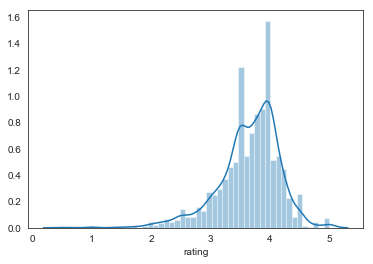

In [99]:
sns.distplot(ratings['rating'],bins= 50)

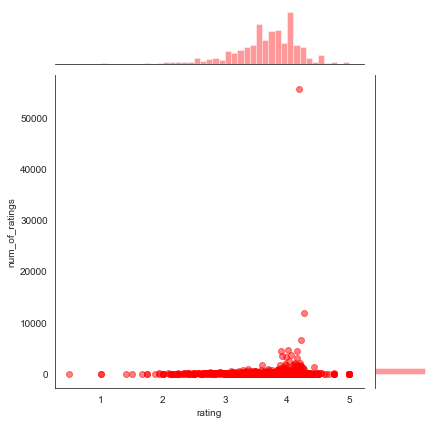

In [100]:
sns.jointplot(x = 'rating',y = 'num_of_ratings',data = ratings,alpha = 0.5,color = 'red')

In [101]:
moviemat = df.pivot_table(index = 'userId_y',columns = 'title',values = 'rating')

In [102]:
moviemat.head()

title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
userId_y,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
ratings.sort_values('num_of_ratings',ascending = False).head(10)

,rating,num_of_ratings
title,,
Pulp Fiction (1994),4.197068,55567
Fight Club (1999),4.272936,11772
Star Wars: Episode IV - A New Hope (1977),4.231076,6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),4.018797,4655
2001: A Space Odyssey (1968),3.894495,4469
Eternal Sunshine of the Spotless Mind (2004),4.160305,4454
Inception (2010),4.066434,3718
"Big Lebowski, The (1998)",3.924528,3392
Donnie Darko (2001),3.981651,3161


In [104]:
pulp_fiction_rating = moviemat['Pulp Fiction (1994)']
fight_club_rating = moviemat['Fight Club (1999)']

In [105]:
pulp_fiction_rating.head()

userId_y
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

In [106]:
pulp_fiction_rating.dropna(inplace = True)

In [107]:
pulp_fiction_rating.head()

userId_y
1    3.0
4    1.0
5    5.0
6    2.0
8    4.0
Name: Pulp Fiction (1994), dtype: float64

In [108]:
fight_club_rating.dropna(inplace = True)

In [109]:
fight_club_rating.head()

userId_y
1     5.0
4     2.0
10    0.5
15    2.5
16    3.5
Name: Fight Club (1999), dtype: float64

In [110]:
similar_to_pf = moviemat.corrwith(pulp_fiction_rating)
similar_to_fc = moviemat.corrwith(fight_club_rating)

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [111]:
corr_pf = pd.DataFrame(similar_to_pf,columns = ['Correlation'])

In [112]:
corr_fc = pd.DataFrame(similar_to_fc,columns = ['Correlation'])

In [113]:
corr_pf.head()

,Correlation
title,
(500) Days of Summer (2009),-0.044034
...And Justice for All (1979),-0.188982
10 Cloverfield Lane (2016),-0.201347
10 Things I Hate About You (1999),-0.126206
101 Dalmatians (1996),0.289800


In [114]:
corr_fc.head()

,Correlation
title,
(500) Days of Summer (2009),-0.044359
...And Justice for All (1979),1.000000
10 Cloverfield Lane (2016),-0.091902
10 Things I Hate About You (1999),0.265522
101 Dalmatians (1996),0.160557


In [115]:
corr_pf.sort_values('Correlation',ascending = False).head()

,Correlation
title,
"Sure Thing, The (1985)",1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0
Staying Alive (1983),1.0
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Song of the Little Road (Pather Panchali) (1955),1.0


In [116]:
corr_fc.sort_values('Correlation',ascending = False).head()

,Correlation
title,
"Day of the Jackal, The (1973)",1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0
Poltergeist III (1988),1.0
All the Real Girls (2003),1.0
"Return, The (Vozvrashcheniye) (2003)",1.0


In [117]:
corr_pf = corr_pf.join(ratings['num_of_ratings']).sort_values('Correlation',ascending = False)

In [118]:
corr_pf.head()

,Correlation,num_of_ratings
title,,
"Sure Thing, The (1985)",1.0,4
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0,2
Staying Alive (1983),1.0,2
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2
Song of the Little Road (Pather Panchali) (1955),1.0,2


In [119]:
corr_fc = corr_fc.join(ratings['num_of_ratings']).sort_values('Correlation',ascending = False)

In [120]:
corr_fc.head()

,Correlation,num_of_ratings
title,,
"Day of the Jackal, The (1973)",1.0,6
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0,2
Poltergeist III (1988),1.0,4
All the Real Girls (2003),1.0,2
"Return, The (Vozvrashcheniye) (2003)",1.0,3


In [121]:
corr_pf[corr_pf['num_of_ratings']>100].sort_values('Correlation',ascending = False).head()

,Correlation,num_of_ratings
title,,
Pulp Fiction (1994),1.000000,55567
"Wolf of Wall Street, The (2013)",0.579915,270
Old Boy (2003),0.564115,312
Fight Club (1999),0.543465,11772
In the Mood For Love (Fa yeung nin wa) (2000),0.514500,252


In [122]:
corr_fc[corr_fc['num_of_ratings']>100].sort_values('Correlation',ascending = False).head()

,Correlation,num_of_ratings
title,,
Fight Club (1999),1.000000,11772
The Lego Movie (2014),0.743619,217
"Wolf of Wall Street, The (2013)",0.718489,270
Django Unchained (2012),0.635760,852
Life Is Beautiful (La Vita è bella) (1997),0.629640,704
